- 5에서 찍어낸 수치들로 예측

In [1]:
from glob import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "../take-home-interview/"

In [3]:
app = pd.read_csv(data_path + "loan_application.csv")

credit_feature = pd.read_pickle(data_path+"credit_feature.pkl")
balance_feature = pd.read_pickle(data_path+"balance_feature.pkl")
payment_feature = pd.read_pickle(data_path+"payment_feature.pkl")
app_prev_feature = pd.read_pickle(data_path+"app_prev_feature.pkl")

### Evaluate

In [4]:
from sklearn.model_selection import train_test_split

import evaluate_with_lightgbm

auc_dic = {}

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15822, number of negative: 180984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11288
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 115
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080394 -> initscore=-2.437007
[LightGBM] [Info] Start training from score -2.437007
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.741059
[4

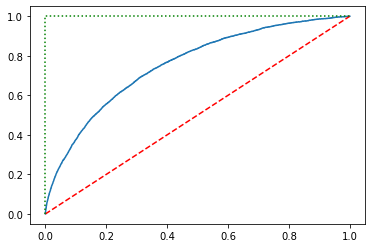

AUC on train: 0.8228
AUC on test: 0.7555
f1_score on train: 0.3144
f1_score on test: 0.2689


In [5]:
df = app.loc[app['type'] == 'train'].drop('type', axis=1).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)
auc_dic['app_only'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15783, number of negative: 181023
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22302
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 169
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080196 -> initscore=-2.439691
[LightGBM] [Info] Start training from score -2.439691
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.739603
[4

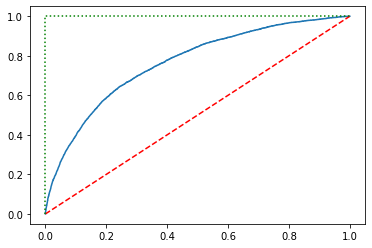

AUC on train: 0.8154
AUC on test: 0.7647
f1_score on train: 0.3087
f1_score on test: 0.2817


In [6]:
## ADD BALANCE
df = app.loc[app['type'] == 'train'].drop("type", axis=1).reset_index(drop=True)
df = df.merge(balance_feature, on="application_id_current", how='left')

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)
auc_dic['app_balance'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15786, number of negative: 181020
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28607
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 210
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080211 -> initscore=-2.439484
[LightGBM] [Info] Start training from score -2.439484
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.745676
[4

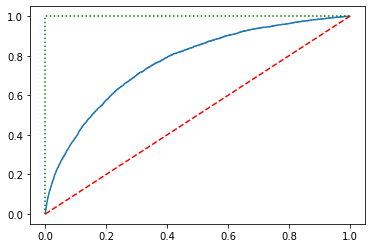

AUC on train: 0.8419
AUC on test: 0.7674
f1_score on train: 0.3356
f1_score on test: 0.2865


In [7]:
## ADD CREDIT
df = df.merge(credit_feature, on="application_id_current", how='left')

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)
auc_dic['app_balance_credit'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15937, number of negative: 180869
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31788
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 221
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080978 -> initscore=-2.429130
[LightGBM] [Info] Start training from score -2.429130
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.748452
[40]	valid_0's auc: 0.755752
[60]	valid_0's auc: 0.761316
[80]	val

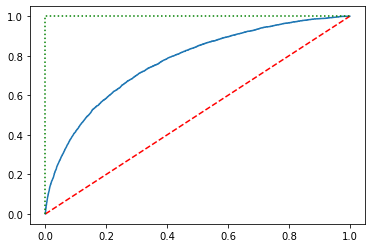

AUC on train: 0.8392
AUC on test: 0.7701
f1_score on train: 0.3314
f1_score on test: 0.2833


In [8]:
## ADD PAYMENT
df = df.merge(payment_feature, on="application_id_current", how='left')

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)
auc_dic['app_balance_credit_payment'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15905, number of negative: 180901
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.230203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50910
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 493
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080816 -> initscore=-2.431316
[LightGBM] [Info] Start training from score -2.431316
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.742056
[40]	valid_0's auc: 0.750766
[60]	valid_0's auc: 0.757536
[80]	val

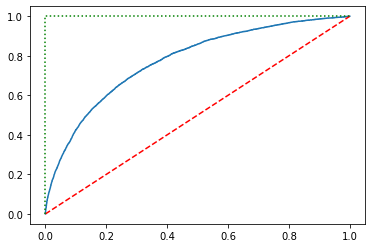

AUC on train: 0.8475
AUC on test: 0.7753
f1_score on train: 0.3422
f1_score on test: 0.2935


In [9]:
## ADD APP_PREV
df = df.merge(app_prev_feature, on="application_id_current", how='left')

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)
auc_dic['all_features'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15856, number of negative: 180950
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.371299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50921
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 493
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080567 -> initscore=-2.434673
[LightGBM] [Info] Start training from score -2.434673
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.748695
[40]	valid_0's auc: 0.757672
[60]	valid_0's auc: 0.763717
[80]	val

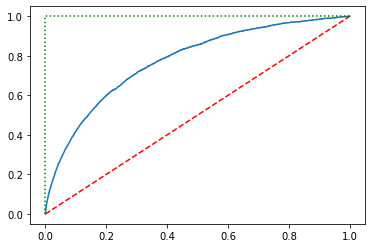

AUC on train: 0.8541
AUC on test: 0.7749
f1_score on train: 0.3489
f1_score on test: 0.2927


In [10]:
## ALL WITH FEATURE SELECTION
auc_dic['feature_importance_filted'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test, X_train.shape[1] // 5)

### Final result

In [11]:
pd.Series(auc_dic).sort_values().reset_index()

,index,0
0,app_only,0.755476
1,app_balance,0.764705
2,app_balance_credit,0.767372
3,app_balance_credit_payment,0.770142
4,feature_importance_filted,0.774883
5,all_features,0.775250


### BO

In [12]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
categorical_feats = X_train.dtypes[X_train.dtypes == 'object'].index.tolist()

In [15]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.05, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, categorical_feature = categorical_feats, free_raw_data=False)
    # parameters
    def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
        params = {'application':'binary','num_iterations': n_estimators, 'learning_rate':learning_rate, 'early_stopping_round':100, 'metric':'auc'}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 8.99),
                                            'lambda_l1': (0, 5),
                                            'lambda_l2': (0, 3),
                                            'min_split_gain': (0.001, 0.1),
                                            'min_child_weight': (5, 50)}, random_state=0)
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # output optimization process
    if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
    # return best parameters
    return lgbBO.res

## 5분 내외 소요
# opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=10, n_folds=3, random_seed=6, n_estimators=100, learning_rate=0.05)

# pd.DataFrame(opt_params).nlargest(1, 'target')['params'].values[0]
"""
{'bagging_fraction': 0.9741567872981456,
 'feature_fraction': 0.9,
 'lambda_l1': 2.5291055896332906,
 'lambda_l2': 0.0,
 'max_depth': 8.99,
 'min_child_weight': 36.880021622488194,
 'min_split_gain': 0.1,
 'num_leaves': 39.513362560906124}
 """

## Predict

In [17]:
import lightgbm

In [18]:
submit_df = app[app['type'] == 'test'].drop('type', axis=1)

submit_df = submit_df.merge(balance_feature, on="application_id_current", how='left')
submit_df = submit_df.merge(credit_feature, on="application_id_current", how='left')
submit_df = submit_df.merge(payment_feature, on="application_id_current", how='left')
submit_df = submit_df.merge(app_prev_feature, on="application_id_current", how='left')

submit_df = submit_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [19]:
%%time
## missing은 handle하는 게 default
train_data = lightgbm.Dataset(df.drop(['application_id_current', 'target'], axis=1), label=df['target'])

parameters = evaluate_with_lightgbm._get_params()

model = lightgbm.train(
    parameters,
    train_data,
    num_boost_round=400,
#     early_stopping_rounds=100,
    verbose_eval=20
)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50987
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 494
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [20]:
submit_predict = model.predict(submit_df.drop(['application_id_current', 'target'], axis=1))

submit_final = submit_df[['application_id_current']].assign(target=submit_predict)

submit_final.to_csv("submission.csv", index=None)